1st turret + win + <= 25 minutes: 155, Games analyzed: 693, Ratio 22.366522 %
not 1st turret + win + <= 25 minutes: 23, Games analyzed: 693, Ratio 3.318903 %


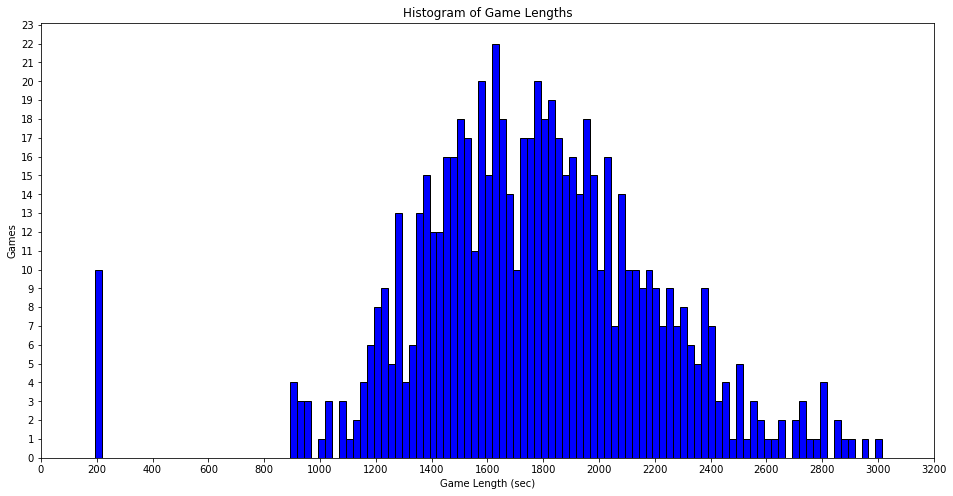

In [4]:
import sqlite3
from sqlite3 import Error
from os import path
import configparser
import logging
import database as db
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def get_game_info(conn):
    try:
        c = conn.cursor()
        sql = """SELECT teams, gameDuration FROM matches;"""
        c.execute(sql)
        return c.fetchall()
    except Error as e:
        print(e)
        return -1

def main():
    config = configparser.ConfigParser()
    config.read('config.ini')
    database_connection = db.create_connection((config['DATABASE']['name'] + '.db'))

    team_info = get_game_info(database_connection)

    counter = 0
    snowball = 0
    anti_snowball = 0
    game_lengts = []

    for team in team_info:
        team_str = str(team[0])
        team_dict = eval(team_str)
        team_100 = eval(str(team_dict[0]))
        team_200 = eval(str(team_dict[1]))
        game_length = team[1]
        game_lengts.append(team[1])


        counter += 1
        
        if team_100['win'] == 'Win' and team_100['firstTower'] == True and game_length <= 1500:
            snowball += 1
        if team_200['win'] == 'Win' and team_200['firstTower'] == True and game_length <= 1500:
            snowball += 1
        
        if team_100['win'] == 'Win' and team_100['firstTower'] == False and game_length <= 1500:
            anti_snowball += 1
        if team_200['win'] == 'Win' and team_200['firstTower'] == False and game_length <= 1500:
            anti_snowball += 1


    print("1st turret + win + <= 25 minutes: %d, Games analyzed: %d, Ratio %f %%" % (snowball, counter, snowball/counter*100))
    print("not 1st turret + win + <= 25 minutes: %d, Games analyzed: %d, Ratio %f %%" % (anti_snowball, counter, anti_snowball/counter*100))
    
    # matplotlib histogram
    plt.figure(figsize=(16,8))
    plt.hist(game_lengts, color = 'blue', edgecolor = 'black',
         bins = int(3400/30))
    plt.xticks(np.arange(0,3400,200))
    plt.yticks(np.arange(0,24,1))

    # Add labels
    plt.title('Histogram of Game Lengths')
    plt.xlabel('Game Length (sec)')
    plt.ylabel('Games')
        

    db.close_connection(database_connection)

if __name__ == '__main__':
    main()



In [35]:
import sqlite3
from sqlite3 import Error
from os import path
import configparser
import logging
import database as db
import json

def get_data(conn):
    try:
        c = conn.cursor()
        sql = """SELECT matchId, championId, stats
                    FROM participants;"""
        c.execute(sql)
        return c.fetchall();
    except Error as e:
        print(e)
        return -1
    
def main():
    config = configparser.ConfigParser()
    config.read('config.ini')
    database_connection = db.create_connection((config['DATABASE']['name'] + '.db'))

    data = get_data(database_connection)
    matches = []
    
    last_game_id = 0
    counter = 0
    
    for data_part in data:
        stats = eval(data_part[2])
        if last_game_id != data_part[0]:
            match = {'gameId': data_part[0]}
            participant = {'championId': data_part[1], 'championDamage': stats['totalDamageDealtToChampions']}
            match[stats['participantId']] = participant
            counter = 0
        if last_game_id == data_part[0]:
            participant = {'championId': data_part[1], 'championDamage': stats['totalDamageDealtToChampions']}
            match[stats['participantId']] = participant
            counter += 1
            if counter == 9: matches.append(match)
        
        last_game_id = data_part[0]
        
    adc_list = (523, 22, 51, 119, 81, 202, 222, 145, 429, 96, 236, 21, 15, 18, 29, 110, 67, 498)
    
    max_damages = []
    
    for match in matches:
        i = 1
        max_damage = 0
        max_damage_id = 0
        while i <= 10:
            participant = match[i]
            if participant['championDamage'] > max_damage:
                max_damage = participant['championDamage']
                max_damage_id = participant['championId']
            
            i += 1
        max_damages.append({'gameId': match['gameId'], 'championId': max_damage_id})
        
    adcs = []
    
    for max_damage in max_damages:
        if max_damage['championId'] in adc_list:
            adcs.append(max_damage)
            
    #adcs = [k['championId'] for k in max_damages if k.get('championId')]
    #adc_occurence = 
    
    print(len(adcs))
    
    print("ADC most damage in: %d games, Total games: %d, Ratio: %f %%" % (len(adcs), len(max_damages), len(adcs)/len(max_damages)*100))
    
if __name__ == '__main__':
    main()

162
ADC most damage in: 162 games, Total games: 514, Ratio: 31.517510 %
